In [21]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


da = pd.read_csv('C:/Users/User/Downloads/jais/shipments.csv')



da.drop(["ID"],inplace=True,axis = 1)
da= da.dropna()  
#label encoding
da["Warehouse_block"].replace({"A":0,"B":1,"C":2,"D":3,"F":4},inplace=True)
da["Mode_of_Shipment"].replace({"Flight":0,"Road":1,"Ship":2},inplace=True)
da["Product_importance"].replace({"high":0,"low":1,"medium":2},inplace=True)
da["Gender"].replace({"M":1,"F":0},inplace=True)
da.Gender=da.Gender.astype(str).str.strip()
da = da.rename({'Reached.on.Time_Y.N':'target'},axis = 1)

# Class count
count_class_0, count_class_1 = da.target.value_counts()

# Divide by class
df_class_0 = da[da['target'] == 0]
df_class_1 = da[da['target'] == 1]


df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
norm_data=df_test_over[['Cost_of_the_Product','Discount_offered','Weight_in_gms']]

ntdata= (norm_data - np.min(norm_data)) / (np.max(norm_data) - np.min(norm_data))
dat=df_test_over.drop(['Cost_of_the_Product','Discount_offered','Weight_in_gms'],axis=1)
newdata=pd.concat([ntdata,dat],axis=1)


y = newdata.target
x = newdata.drop('target', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.14,shuffle=True,random_state=45)


from imblearn.over_sampling import SMOTE

# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='not minority')
x_train_enn, y_train_enn=smote.fit_resample(x_train,y_train)







In [22]:
model_ran = LogisticRegression()

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv=KFold(10,random_state=56,shuffle=True)
cross_val_score(model_ran,x_train,y_train,cv=cv)

array([0.63530655, 0.66596195, 0.64059197, 0.67230444, 0.62473573,
       0.63636364, 0.62896406, 0.64799154, 0.63319239, 0.67195767])

In [24]:
model_ran.fit(x_train_enn, y_train_enn)

LogisticRegression()

In [25]:
y_pred=model_ran.predict(x_test)

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59       692
           1       0.67      0.71      0.69       848

    accuracy                           0.65      1540
   macro avg       0.64      0.64      0.64      1540
weighted avg       0.65      0.65      0.65      1540



<AxesSubplot:xlabel='row_0'>

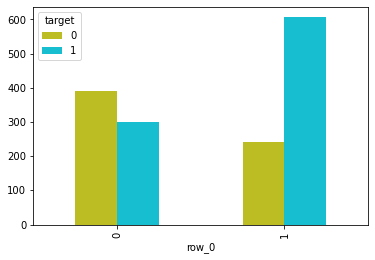

In [27]:
pd.crosstab(y_pred,y_test).plot(kind='bar',color=['C8','C9'])